## Model Training

#### 1.1 Import Data and Requried Packages

- Importing pandas,Numpy,Matplotlib,Seaborn,and Warnings Library.

In [2]:
# required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('./DATA/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'],axis=1)


In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
Y = df['math_score']

In [9]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [10]:
# create a column Transformer with 3 types of transformers

numerical_columns = X.select_dtypes(exclude='object').columns
categorical_columns = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
  [
    ("One Hot Encoder",ohe_transformer,categorical_columns),
    ("Standard Scalar",numeric_transformer,numerical_columns)
  ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
# separate dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after Model Training

In [14]:
def evaluate_model(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  rmse = np.sqrt(mse)
  r2_square = r2_score(true,predicted)
  return mae,mse,rmse,r2_square

In [16]:
# models
models = {
  "Linear Regression" : LinearRegression(),
  "Lasso" : Lasso(),
  "Ridge" : Ridge(),
  "K-Neighbors Regressor":KNeighborsRegressor(),
  "Decision Tree" : DecisionTreeRegressor(),
  "Random Forest Regressor":RandomForestRegressor(),
  "XGBRegressor":XGBRegressor(),
  "CatBoost Regressor":CatBoostRegressor(verbose=False),
  "AdaBoost Regressor":AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  # make prediction
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # Evaluate Train and Test Dataset
  model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)


  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model Performance for Training set')
  print(f"- Means Squared Error : {model_train_mse}")
  print(f'- Mean Absolute Error : {model_train_mae}')
  print(f'-  Root Mean Square error : {model_train_rmse} ')
  print(f'- R2 Score : {model_train_r2}')

  print(f'---------------------------------------')

  print('Model Performance for Testing set')
  print(f"- Means Squared Error : {model_test_mse}")
  print(f'- Mean Absolute Error : {model_test_mae}')
  print(f'-  Root Mean Square error : {model_test_rmse} ')
  print(f'- R2 Score : {model_test_r2}')
  r2_list.append(model_test_r2)
  print('='*35)
  print('\n')

Linear Regression
Model Performance for Training set
- Means Squared Error : 28.380758972167968
- Mean Absolute Error : 4.27880859375
-  Root Mean Square error : 5.327359474652332 
- R2 Score : 0.8741136595329527
---------------------------------------
Model Performance for Testing set
- Means Squared Error : 29.26380859375
- Mean Absolute Error : 4.2259375
-  Root Mean Square error : 5.40960336750764 
- R2 Score : 0.8797402769404664


Lasso
Model Performance for Training set
- Means Squared Error : 43.47840400585579
- Mean Absolute Error : 5.206302661246526
-  Root Mean Square error : 6.593815587795566 
- R2 Score : 0.8071462015863456
---------------------------------------
Model Performance for Testing set
- Means Squared Error : 42.50641683841162
- Mean Absolute Error : 5.157881810347763
-  Root Mean Square error : 6.51969453566742 
- R2 Score : 0.8253197323627852


Ridge
Model Performance for Training set
- Means Squared Error : 28.33778823308244
- Mean Absolute Error : 4.264987823

### Result

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score'])

,Model Name,R2_Score
0,Linear Regression,0.879740
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.722567
5,Random Forest Regressor,0.851988
6,XGBRegressor,0.827797
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.844703


#### Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print(f'Accuracy of the model is : {score}')

Accuracy of the model is : 87.97402769404664


#### plot y_pred and y_test

Text(0, 0.5, 'predicted')

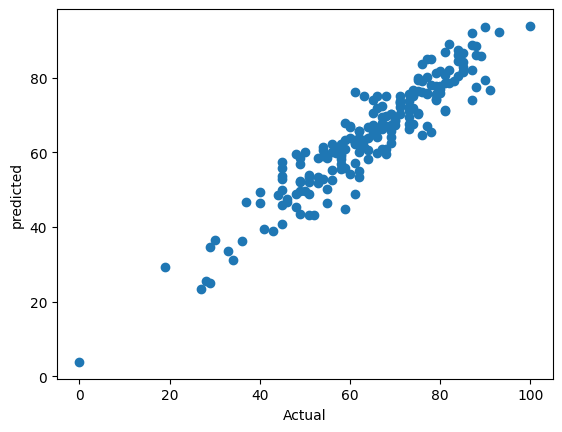

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

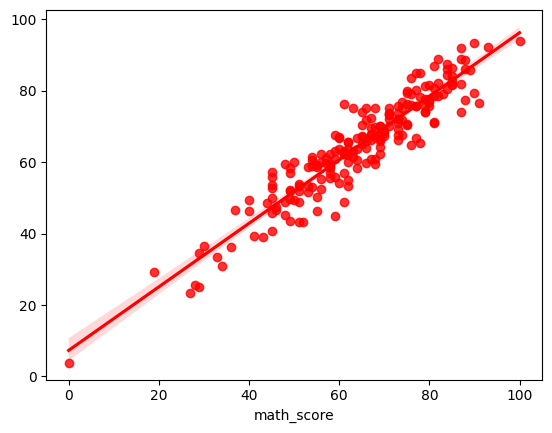

In [21]:
sns.regplot(x=y_test,y=y_pred,color='red')

#### Diffrence between Actual and Predicted values

In [22]:
pred_df = pd.DataFrame({'Actual value':y_test,'predicted value':y_pred,'diffrence':y_test-y_pred})
pred_df

,Actual value,predicted value,diffrence
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
